# Deviation estimation
First, let us specifically state what we want to do: given a set of 2-D data points $(x,y)$, find the coefficients $a$ and $b$ such that a certain error metric is minimized. The question behind this exercise is to formulate the underlying linear programming problem for linear error metrics.

The regression curve we are going to formulate has the following form: $y = ax + b$. Therefore, given a point $(x_j,y_j)$, the error $z_j$ is given by:
\begin{equation}
z_j = ax_j + b - y_j
\end{equation}

## Initialization and data generation
To do regression, we need some data. Therefore, we generate the following random data set.

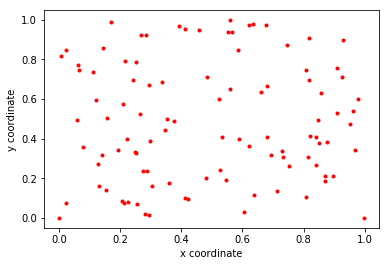

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import xpress as xp
%env XPRESS=..
import math

n = 100
nRange = range(n)
coord = np.random.rand(n,2);

# Define the plotting function so that it can be reused for post-processing as well
def plotting(coord, a, b): 
    plt.plot(coord[:,0], coord[:,1],'r.')
    
    if a is not None:
        x = np.linspace(0,1,100)    
        plt.plot(x,a*x + b)
    plt.xlabel('x coordinate')
    plt.ylabel('y coordinate');
    plt.show()
    
plotting(coord, None, None);

## Least absolute deviations estimation
### Modelling
In the least absolute deviations estimation, we use the following objective function $\sum \limits_{j\in J} \left|z_j\right|$. The idea is that we minimize the linear deviation from the main regression line without penalizing outliers more (as done in higher-norm variations). This means that we want to solve has the following form:
\begin{equation}
\begin{array}{ll}
\underset{a,b,\{z_j, \forall j\}}{\text{minimize}} & \sum \limits_{j} \left|z_j\right| \\
\text{subject to} & z_j = ax_j + b - y_j
\end{array}
\end{equation}

However, we cannot have the absolute value $\left|\cdot\right|$ just like this. Therefore, we have to introduce two auxiliary variables per absolute value formulation:
\begin{align}
z_j &= z_j^+ - z_j^- \\
\left|z_j\right| &= z_j^+ + z_j^-
\end{align}
with $z_j^+,z_j^-\geq 0$. This means, we are actually going to solve the following:
\begin{equation}
\begin{array}{ll}
\underset{a,b,\{z_j, \forall j\}}{\text{minimize}} & \sum \limits_{j} z_j^+ + z_j^- \\
\text{subject to} & z_j^+ - z_j^- = ax_j + b - y_j \\
& z_j^+,z_j^- \geq 0, \hspace{0.3cm} \forall j
\end{array}
\end{equation}

**How do you write this in code?**

## Least maximum deviation estimation
Let's do the other case now. In this variant, we only penalize the largest outlier, i.e. we push the system to give us the linear regression that has the lowest extreme values. This can often be helpful in situations where you want to "robustify" a solution: say the different data points are historic values of delivery times, then it makes sense that you would want to minimize the maximum deviation rather than, say, the least square error.

Ok, but how do the equations look?
\begin{equation}
\begin{array}{ll}
\underset{a,b,\{z_j, \forall j\}}{\text{minimize}} & \max \limits_{j} z_j^+ + z_j^- \\
\text{subject to} & z_j^+ - z_j^- = ax_j + b - y_j \\
& z_j^+,z_j^- \geq 0, \hspace{0.3cm} \forall j
\end{array}
\end{equation}
Using the clever epigraph trick (see e.g. [here](http://eceweb.ucsd.edu/~gert/ECE273/CvxOptTutPaper.pdf)), we can therefore get:
\begin{equation}
\begin{array}{ll}
\underset{t,a,b,\{z_j, \forall j\}}{\text{minimize}} & t \\
\text{subject to} & z_j^+ - z_j^- = ax_j + b - y_j \\
& z_j^+ + z_j^- \leq t \\
& z_j^+,z_j^- \geq 0, \hspace{0.3cm} \forall j
\end{array}
\end{equation}

**How does this look like in code?**